![Python Logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


#                      **Data Analysis Report on California Housing Data**

                            



# **Submitted by: M ABBAS**

## Table of Contents
1. [Introduction](#introduction)
2. [Objectives](#objectives)
3. [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
    Data Cleaning and Preprocessing  
3.1 - [Handling missing values](#handling-missing-values)  
3.2 - [Removing duplicates](#removing-duplicates)  
3.3 - [Identifying and dealing with outliers](#identifying-and-dealing-with-outliers)  
3.4 - [Checking for and addressing skewness](#checking-for-and-addressing-skewness)
        
4. [Feature Engineering](#feature-engineering)

    4.1 - [Standard Scaler](#standard-scaler)
        
    4.2 - [MinMax Scaler](#minmax-scaler)  

5. [Correlation Analysis](#correlation-analysis)
6. [Modeling](#modeling)

   6.1 - [Linear Regression](#linear-regression)

   6.2 - [Polynomial Regression](#polynomial-regression)

7. [PCA](#PCA)       
8. [Hypothesis Testing](#hypothesis-testing)

   8.1 - [t-test](#t-test)

   8.2 - [z-test](#z-test)

   8.3 - [chi-square test](#chi-square-test)
8. [Conclusion](#conclusion)
9. [References](#references)

### 1 Introduction

In this project, we aim to analyze the relationship between various housing features and median house prices (MedHouseVal) using a dataset from the California housing market. The objectives include exploring how different features impact house prices and evaluating the effectiveness of linear regression models and polynomial regression in predicting house values.


## 2 Objectives of the Analysis

The objectives of this analysis are as follows:

1. **Identify Key Factors Influencing House Prices:** Explore and analyze the California housing dataset to determine which factors most significantly affect house prices.

2. **Quantify Relationships Between Variables:** Use statistical methods such as correlation analysis and regression modeling to quantify the relationships between housing prices and various demographic and economic factors.

3. **Evaluate Model Performance:** Assess the performance of predictive models, such as linear regression and plonomial regression, in predicting house prices based on selected features. Determine the model's accuracy and robustness to ensure reliable results.

5. **Contribute to Data Literacy and Analysis Skills:** Enhance understanding of data analysis techniques and methodologies through practical application on a real-world dataset, thereby improving skills in data interpretation and presentation.

In [59]:
pip install nbconvert

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install pandas numpy seaborn matplotlib scikit-learn scipy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
california_housing = fetch_california_housing(as_frame=True)

# Convert to a DataFrame
df = california_housing.frame

# Display the first few rows of the DataFrame
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## 3 Data Cleaning and Preprocessing
Describe the steps taken to clean and preprocess the data, including:
- Handling missing values
- Removing duplicates
- Identifying and dealing with outliers
- Checking for and addressing skewness

## 3.1 Handling missing values

Text(0.5, 1.0, 'Total missing values ')

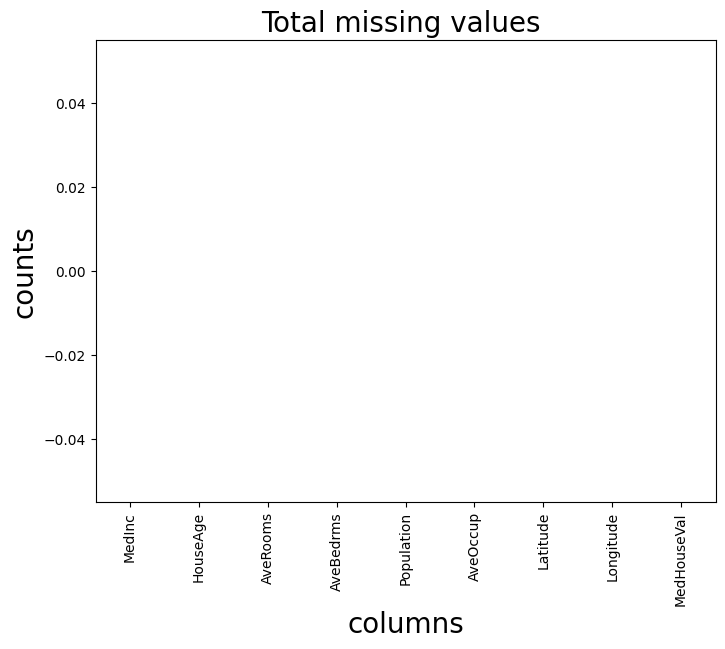

In [7]:
#Handling any null values...
total = df.isnull().sum().sort_values(ascending=False)
total_select = total.head(30)
total_select.plot(kind = 'bar', figsize = (8,6), fontsize = 10)
plt.xlabel("columns", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.title("Total missing values ", fontsize = 20)

**After a thorough examination of the dataset,from the above diagram it has been confirmed that there are no missing values present.**

## 3.2 Removing duplicates

In [8]:
# check for duplicate....
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [9]:
# Check for duplicates based on multiple columns
duplicates_based_on_multiple_columns = df[df.duplicated(['MedInc', 'HouseAge', 'AveRooms'])]

# Count the number of duplicate rows
duplicate_count = duplicates_based_on_multiple_columns.duplicated().sum()

print(f"Number of duplicate rows based on 'MedInc', 'HouseAge', and 'AveRooms' columns: {duplicate_count}")

Number of duplicate rows based on 'MedInc', 'HouseAge', and 'AveRooms' columns: 0


In [10]:
# Check for duplicates across all columns
duplicates_all_columns = df[df.duplicated(keep=False)]

# Display the duplicate rows
print(f"Number of duplicate rows based on all columns: {len(duplicates_all_columns)}")
print(duplicates_all_columns)

Number of duplicate rows based on all columns: 0
Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal]
Index: []


In [11]:
#Alternatively wat to check duplicate...
df.index.is_unique

True

**After a comprehensive examination for duplicates based on multiple columns and a detailed check across all columns of the dataset, it has been thoroughly verified that there are no duplicate entries present. This ensures the integrity and uniqueness of the data for further analysis.**

In [12]:
housing = df

## 3.3 Identifying and dealing with outliers

In [13]:
import seaborn as sns

### Visualization before removing outliers

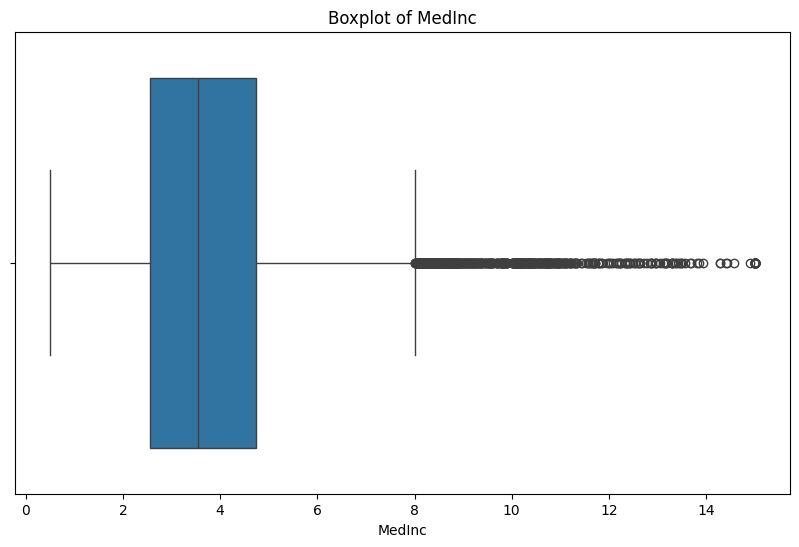

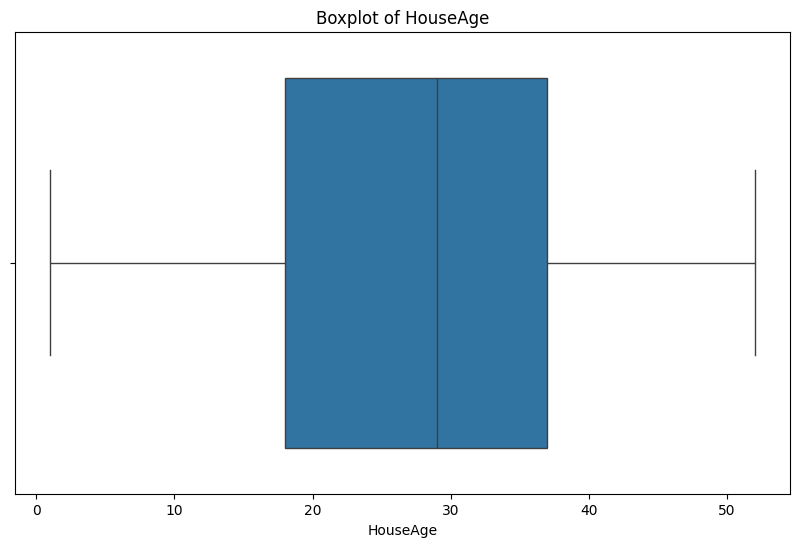

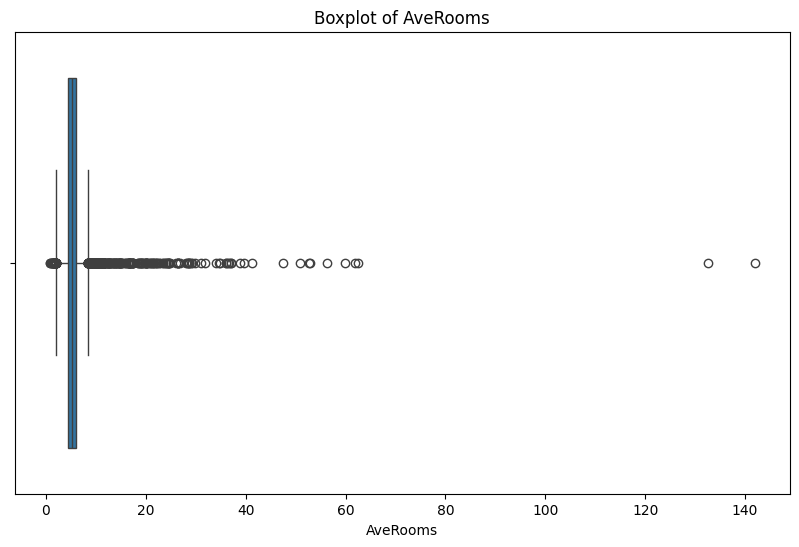

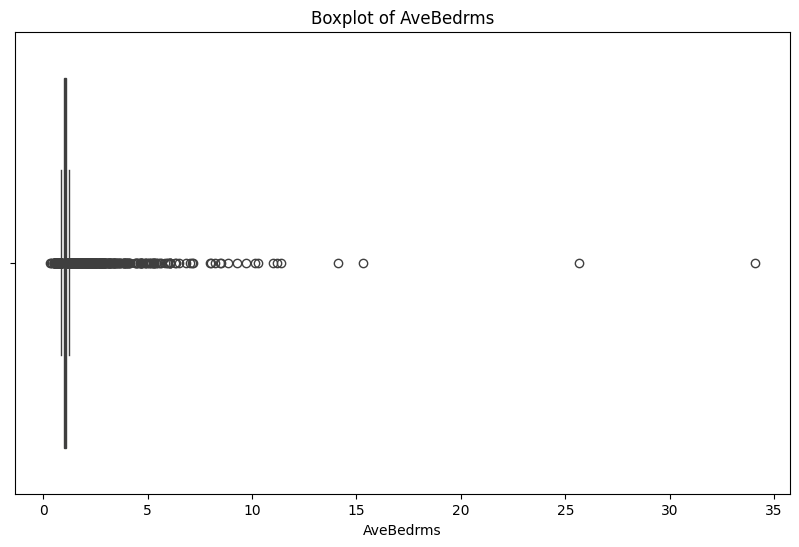

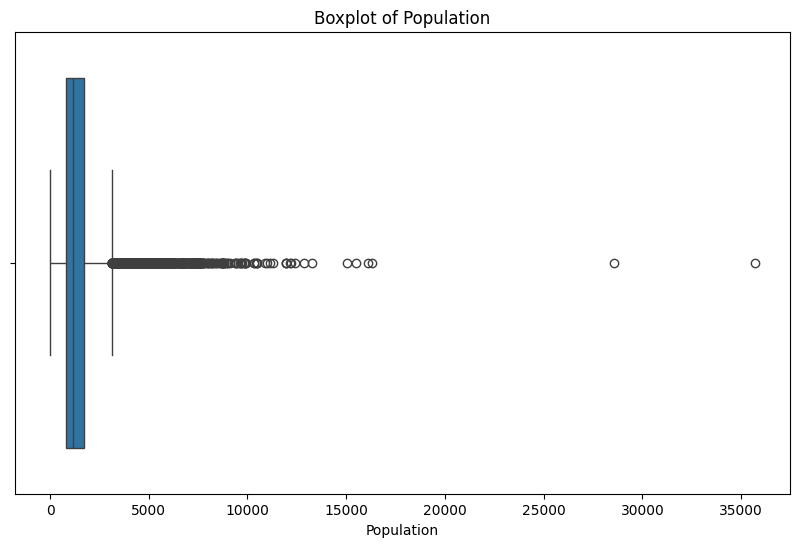

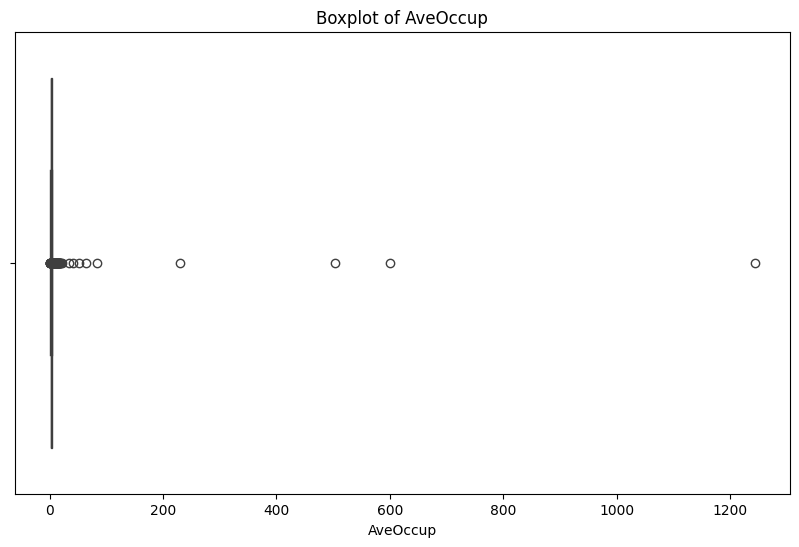

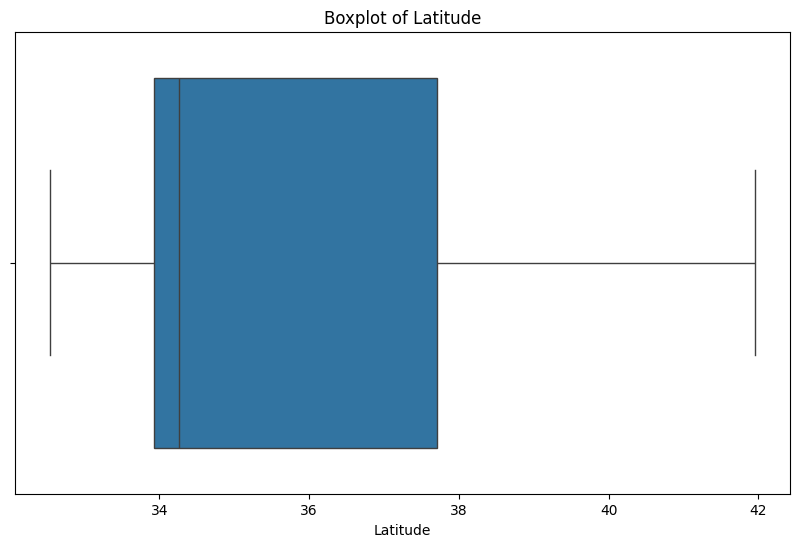

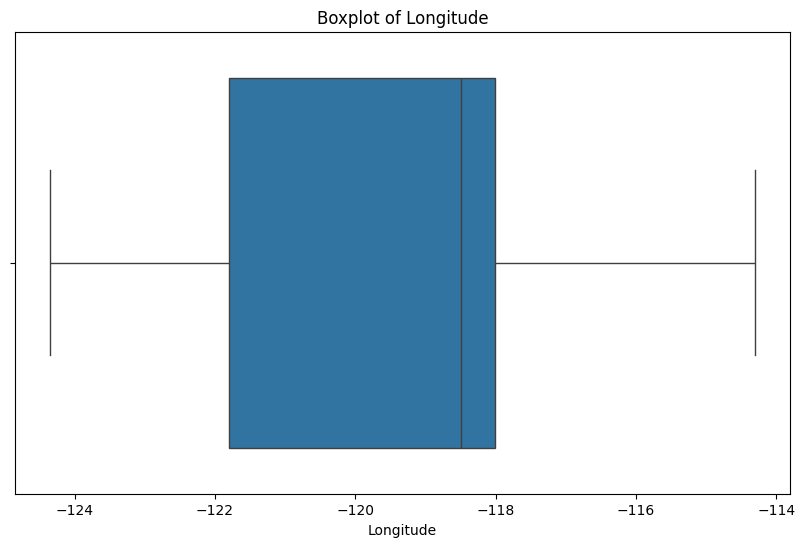

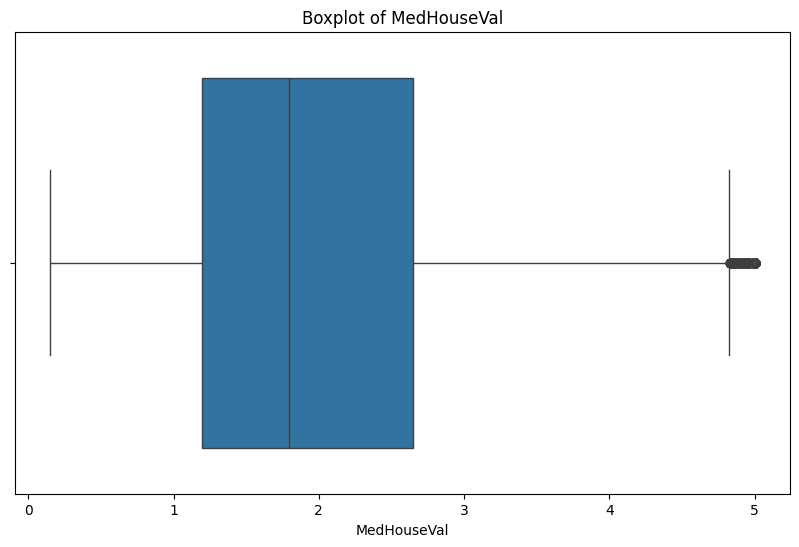

In [14]:
for column in housing.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=housing[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

**Our visualizations indicate the presence of outliers in the dataset. It is necessary to remove these outliers from the affected columns to ensure the accuracy and reliability of our analysis.**

### IQR METHOD

In [15]:
# Functon is use to remove outliers through IQR method......
def remove_outliers(df, columns, factor=1.5):
    initial_length = len(df)
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    removed_rows = initial_length - len(df)
    return df, removed_rows

# List of columns with outliers
columns_with_outliers = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']

# Initialize with the original DataFrame
housing_cleaned = housing.copy()

# Perform multiple iterations of outlier removal
num_iterations = 3
total_removed = 0
for i in range(num_iterations):
    housing_cleaned, removed = remove_outliers(housing_cleaned, columns_with_outliers)
    total_removed += removed
    print(f"Iteration {i + 1}: Number of rows after removal = {len(housing_cleaned)}, Outliers removed in this iteration = {removed}")

# Final check after all iterations
print(f"Final number of rows after {num_iterations} iterations: {len(housing_cleaned)}")
print(f"Total number of outliers removed: {total_removed}")

# Optionally, check the remaining outliers in each column after the final iteration
remaining_outliers = housing_cleaned[columns_with_outliers].apply(lambda x: (x < housing[x.name].quantile(0.25) - 1.5 * (housing[x.name].quantile(0.75) - housing[x.name].quantile(0.25))) | (x > housing[x.name].quantile(0.75) + 1.5 * (housing[x.name].quantile(0.75) - housing[x.name].quantile(0.25)))).sum()
print(f"Remaining outliers after {num_iterations} iterations:\n{remaining_outliers}")

Iteration 1: Number of rows after removal = 16232, Outliers removed in this iteration = 4408
Iteration 2: Number of rows after removal = 15348, Outliers removed in this iteration = 884
Iteration 3: Number of rows after removal = 15072, Outliers removed in this iteration = 276
Final number of rows after 3 iterations: 15072
Total number of outliers removed: 5568
Remaining outliers after 3 iterations:
MedInc         0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
MedHouseVal    0
dtype: int64


**We used the IQR method to remove outliers from our dataset. The results from the outlier removal process are as given above:**

**Final number of rows after 3 iterations: 15,072**

**Total number of outliers removed: 5568, and remeaning outliers after 3 iteration is 0 in all columns.**

### Boxplot before & after remove outliers

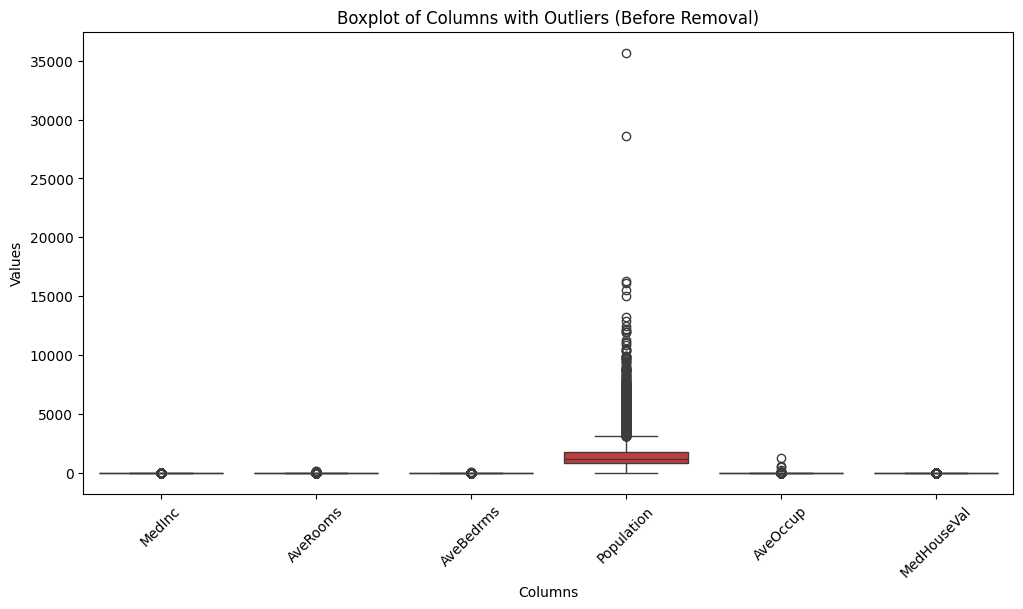

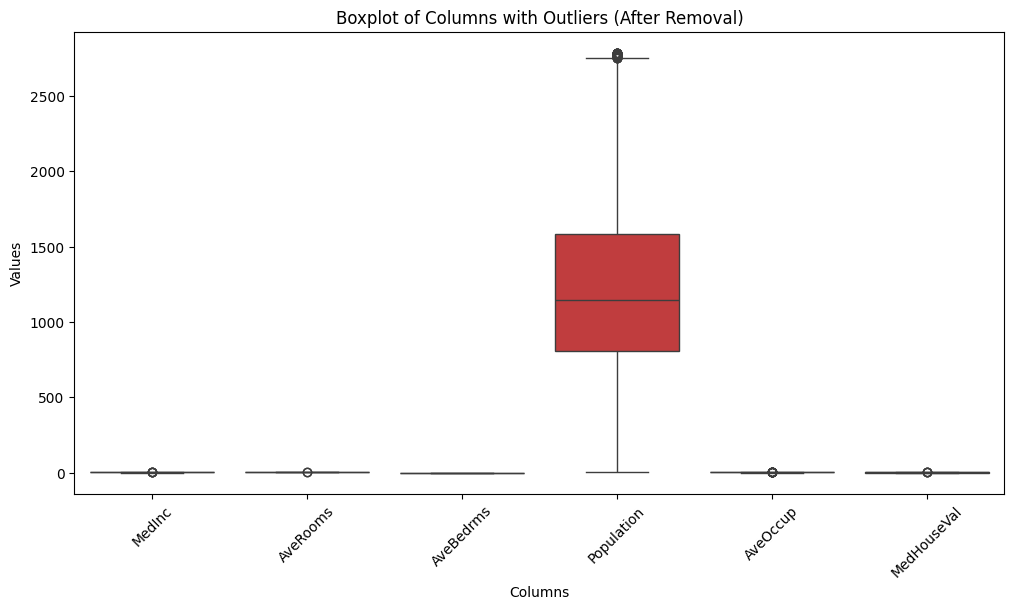

In [16]:
# Boxplot before outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing[columns_with_outliers])
plt.title('Boxplot of Columns with Outliers (Before Removal)')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Boxplot after outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing_cleaned[columns_with_outliers])
plt.title('Boxplot of Columns with Outliers (After Removal)')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

### Histogram before & after remove outliers

<Figure size 1200x600 with 0 Axes>

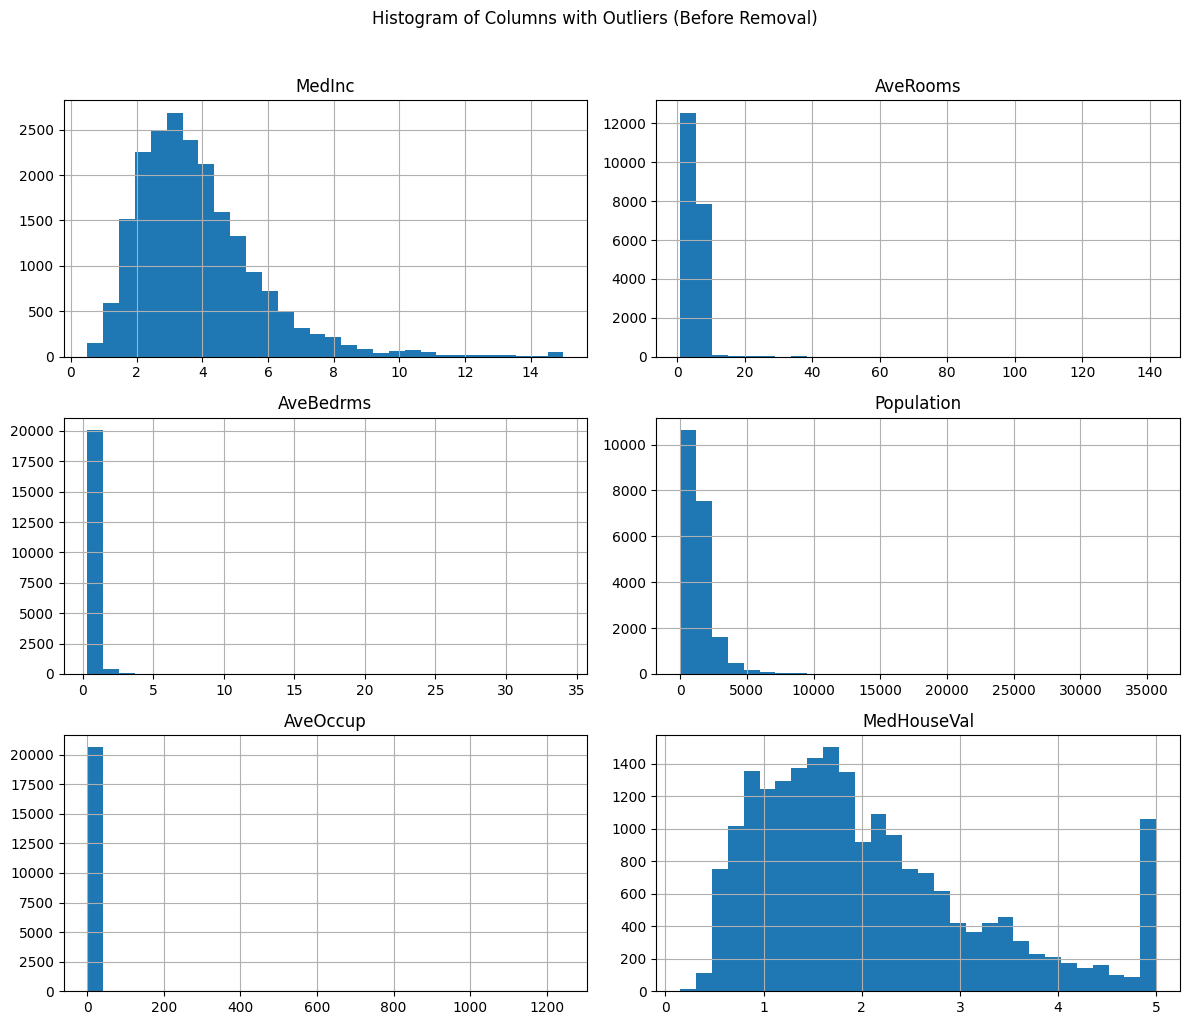

<Figure size 1200x600 with 0 Axes>

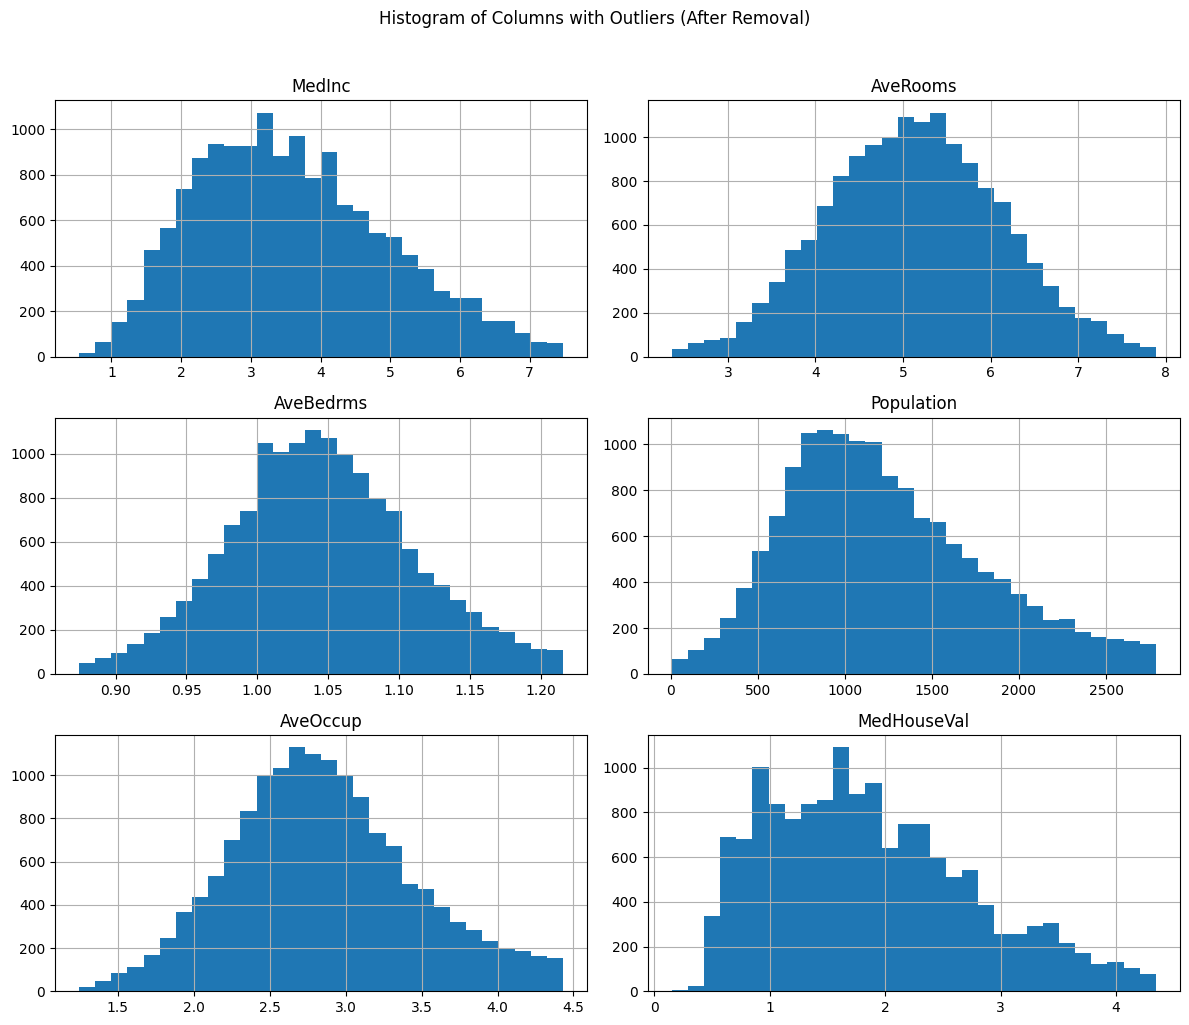

In [17]:
# Histogram before outlier removal
plt.figure(figsize=(12, 6))
housing[columns_with_outliers].hist(bins=30, figsize=(12, 10))
plt.suptitle('Histogram of Columns with Outliers (Before Removal)', y=1.02)
plt.tight_layout()
plt.show()

# Histogram after outlier removal
plt.figure(figsize=(12, 6))
housing_cleaned[columns_with_outliers].hist(bins=30, figsize=(12, 10))
plt.suptitle('Histogram of Columns with Outliers (After Removal)', y=1.02)
plt.tight_layout()
plt.show()

**Boxplot and histogram visualizations before and after outlier removal demonstrate that outliers have been successfully removed from all columns through IQR method.**


### z_score technique

In [18]:
# Function to remove outliers based on z-score
def remove_zscore_outliers(df, threshold=3):
    # Calculate z-scores for all numerical columns
    z_scores = stats.zscore(df)
    
    # Identify rows where any column's z-score exceeds the threshold
    outlier_mask = (z_scores > threshold).any(axis=1)
    
    # Remove outliers from the DataFrame
    df_cleaned = df[~outlier_mask]
    
    # Return the cleaned DataFrame and number of outliers removed
    return df_cleaned, sum(outlier_mask)

# Initialize with the original DataFrame
housing_cleaned = housing.copy()

# Perform iterative outlier removal until no outliers are detected
iteration = 0
while True:
    iteration += 1
    print(f"Iteration {iteration}: Number of rows before removal = {len(housing_cleaned)}")
    
    # Remove outliers using z-score method
    housing_cleaned, outliers_removed = remove_zscore_outliers(housing_cleaned)
    
    # Print number of outliers removed in this iteration
    print(f"Outliers removed in iteration {iteration}: {outliers_removed}")
    
    # Stop the loop if no outliers were removed in the current iteration
    if outliers_removed == 0:
        break

# Final summary after all iterations
print(f"\nFinal number of rows after all iterations: {len(housing_cleaned)}")

Iteration 1: Number of rows before removal = 20640
Outliers removed in iteration 1: 846
Iteration 2: Number of rows before removal = 19794
Outliers removed in iteration 2: 1032
Iteration 3: Number of rows before removal = 18762
Outliers removed in iteration 3: 729
Iteration 4: Number of rows before removal = 18033
Outliers removed in iteration 4: 296
Iteration 5: Number of rows before removal = 17737
Outliers removed in iteration 5: 112
Iteration 6: Number of rows before removal = 17625
Outliers removed in iteration 6: 41
Iteration 7: Number of rows before removal = 17584
Outliers removed in iteration 7: 24
Iteration 8: Number of rows before removal = 17560
Outliers removed in iteration 8: 9
Iteration 9: Number of rows before removal = 17551
Outliers removed in iteration 9: 6
Iteration 10: Number of rows before removal = 17545
Outliers removed in iteration 10: 5
Iteration 11: Number of rows before removal = 17540
Outliers removed in iteration 11: 1
Iteration 12: Number of rows before r

**After applying the IQR method, we utilized the Z-score method to further remove outliers and ensure a more robust dataset. The Z-score method helps to identify outliers by measuring how many standard deviations a data point is from the mean. This method is particularly useful when data follows a normal distribution, ensuring that extreme values are accurately detected and removed.**

**the result are given above after 12 iteration the outliers is succesfully removed from all columns and final number of rows after all iteration is: 17539**

## 3.4 Checking for and addressing skewness

In [19]:
#skewness of all columns...
skew_limit = 0.75  # Define a limit above which we will log transform
skew_vals = housing.skew()

# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0: 'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
print("Skewed columns:\n", skew_cols)

Skewed columns:
                   Skew
AveOccup     97.639561
AveBedrms    31.316956
AveRooms     20.697869
Population    4.935858
MedInc        1.646657
MedHouseVal   0.977763


In [20]:
# Apply log transformation to the skewed columns
for col in skew_cols.index:
    housing[col] = np.log1p(housing[col])  # log1p is used to handle zero values

# Check skewness after log transformation
skew_vals_after = housing[skew_cols.index].skew()
skew_cols_after = (skew_vals_after
                   .sort_values(ascending=False)
                   .to_frame()
                   .rename(columns={0: 'Skew'}))
print("Skewed columns after log transformation:\n", skew_cols_after)

Skewed columns after log transformation:
                  Skew
AveBedrms    8.988786
AveOccup     3.879679
AveRooms     1.390761
MedHouseVal  0.275939
MedInc       0.226083
Population  -1.044087


In [21]:
from scipy.stats import skew, boxcox
# List of columns with skewed data that you want to transform
skewed_cols = ['AveBedrms', 'Population', 'AveRooms']

# Assuming housing is your DataFrame with removed outliers
housing_transformed = housing.copy()  # Create a copy to avoid modifying original data

# Define columns with identified skewness
skewed_cols = ['AveBedrms', 'Population', 'AveRooms']

# Apply Box-Cox transformation to reduce skewness
for col in skewed_cols:
    if housing_transformed[col].skew() > 0:  # Positive skewness
        housing_transformed[col], _ = boxcox(housing_transformed[col] + 1)

# Check skewness after transformations
skewness_after = housing_transformed[skewed_cols].apply(skew)
print("Skewness after Box-Cox transformations:\n", skewness_after)

Skewness after Box-Cox transformations:
 AveBedrms    -1.689433
Population   -1.044011
AveRooms     -0.058200
dtype: float64


**The analysis reveals significant skewness in several columns, indicating the need for skewness removal to ensure a more normalized distribution of data. Initially, we applied the logarithmic transformation (np.log) to the skewed columns AveOccup, AveBedrms, AveRooms, Population, MedInc, and MedHouseVal. This method reduced skewness in the dataset. Subsequently, we applied the Box-Cox transformation to further mitigate skewness, particularly focusing on columns AveBedrms, Population, and AveRooms.These transformations effectively reduced skewness in the dataset, ensuring that the data is more suitable for statistical analysis and modeling.**

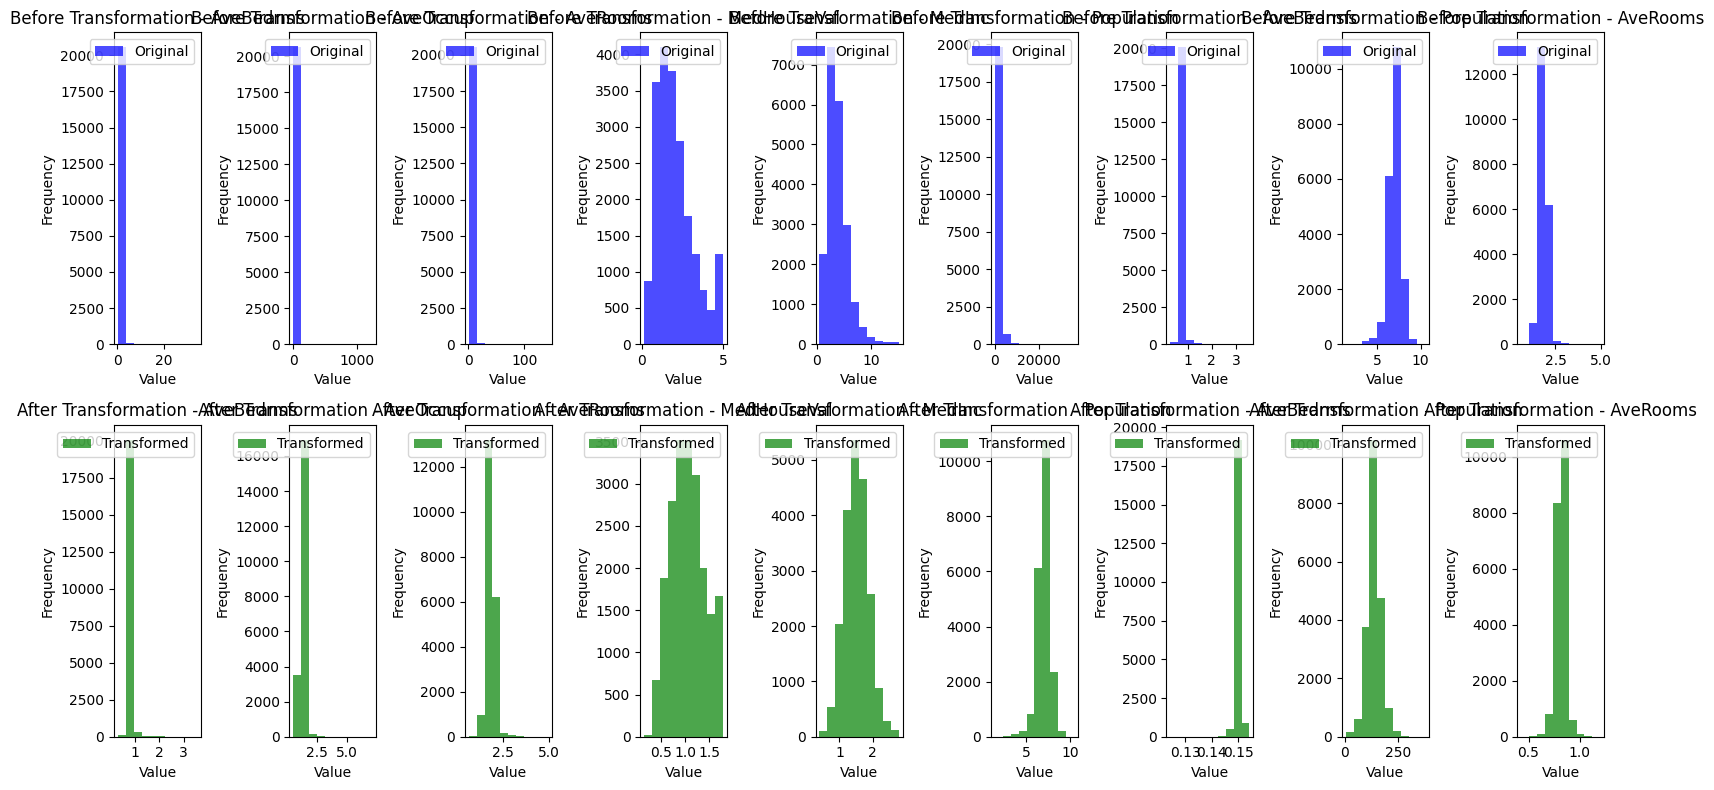

In [22]:
# List of columns that have been log transformed
log_transformed_cols = ['AveBedrms', 'AveOccup', 'AveRooms', 'MedHouseVal', 'MedInc', 'Population']

# List of columns that have been Box-Cox transformed
skewed_cols = ['AveBedrms', 'Population', 'AveRooms']

# Create subplots for each transformed column
num_cols = len(log_transformed_cols) + len(skewed_cols)  # Total number of columns
num_rows = 2  # One row for original data, one row for transformed data

fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 8))

# Plot original and transformed columns
for i, col in enumerate(log_transformed_cols):
    original_data = np.expm1(housing[col])  # Reverting back using expm1
    axs[0, i].hist(original_data, color='blue', alpha=0.7, label='Original')
    axs[0, i].set(title=f"Before Transformation - {col}", xlabel='Value', ylabel='Frequency')
    axs[0, i].legend()

    axs[1, i].hist(housing[col], color='green', alpha=0.7, label='Transformed')
    axs[1, i].set(title=f"After Transformation - {col}", xlabel='Value', ylabel='Frequency')
    axs[1, i].legend()

# Plot Box-Cox transformed columns
for j, col in enumerate(skewed_cols):
    transformed_data, _ = boxcox(housing[col] + 1)  # Apply Box-Cox transformation
    axs[0, i + j + 1].hist(housing[col], color='blue', alpha=0.7, label='Original')
    axs[0, i + j + 1].set(title=f"Before Transformation - {col}", xlabel='Value', ylabel='Frequency')
    axs[0, i + j + 1].legend()

    axs[1, i + j + 1].hist(transformed_data, color='green', alpha=0.7, label='Transformed')
    axs[1, i + j + 1].set(title=f"After Transformation - {col}", xlabel='Value', ylabel='Frequency')
    axs[1, i + j + 1].legend()

plt.tight_layout()
plt.show()

**Following the reduction of skewness in our dataset using logarithmic and Box-Cox transformations, histograms were plotted to visualize the transformation impact across all features.**

**The histograms illustrate the changes in distribution before and after transformation for each feature. This visual analysis confirms that the transformations have successfully normalized the data distributions, making them more suitable for further analysis and modeling.**

## 4. Feature Engineering

### 4.1 Standard Scalar

In [23]:
# Applying Standard Scaler......................
# Identify numerical columns
numerical_cols = housing.select_dtypes(include=[np.number]).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standard scaling to the numerical columns
housing[numerical_cols] = scaler.fit_transform(housing[numerical_cols])

# Verify scaling
print("First few rows after scaling:\n", pd.DataFrame(housing, columns=numerical_cols).head())

First few rows after scaling:
      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  1.995505  0.982143  1.072436  -0.256650   -1.694943 -0.400594  1.052548   
1  1.988380 -0.607019  0.649505  -0.503251    1.030337 -1.046006  1.043185   
2  1.656444  1.856182  1.724704  -0.026779   -1.109604 -0.077335  1.038503   
3  1.049948  1.856182  0.391271  -0.028550   -0.949925 -0.410919  1.038503   
4  0.170631  1.856182  0.675467   0.008089   -0.933021 -0.936282  1.038503   

   Longitude  MedHouseVal  
0  -1.327835     1.834116  
1  -1.322844     1.310050  
2  -1.332827     1.270586  
3  -1.337818     1.202708  
4  -1.337818     1.208428  


### 4.2 MinMax Scaler

In [24]:
# Applying MinMaxScaler......................
# Identify numerical columns
numerical_cols = housing.select_dtypes(include=[np.number]).columns

# Initialize the StandardScaler
scaller = MinMaxScaler()

# Apply standard scaling to the numerical columns
housing[numerical_cols] = scaller.fit_transform(housing[numerical_cols])

# Verify scaling
print("First few rows after scaling:\n", pd.DataFrame(housing, columns=numerical_cols).head())


First few rows after scaling:
      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.771935  0.784314  0.336702   0.127631    0.482772  0.112483  0.567481   
1  0.770856  0.392157  0.314147   0.119681    0.703350  0.092190  0.565356   
2  0.720562  1.000000  0.371486   0.135042    0.530148  0.122647  0.564293   
3  0.628668  1.000000  0.300376   0.134985    0.543072  0.112159  0.564293   
4  0.495437  1.000000  0.315532   0.136166    0.544440  0.095640  0.564293   

   Longitude  MedHouseVal  
0   0.211155     0.950184  
1   0.212151     0.837185  
2   0.210159     0.828676  
3   0.209163     0.814041  
4   0.209163     0.815274  


**After applying feature scaling to our dataset, the transformed features show normalized values suitable for machine learning algorithms.**

**The scaling process has standardized the range of each feature, ensuring that all variables contribute equally to the model without being skewed by their original scales. This transformation facilitates more effective model training and enhances the performance of algorithms that rely on distance-based calculations or gradient-based optimizations.**

In [25]:
new_data = housing.loc[:,['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal']]

## 5 Correlation

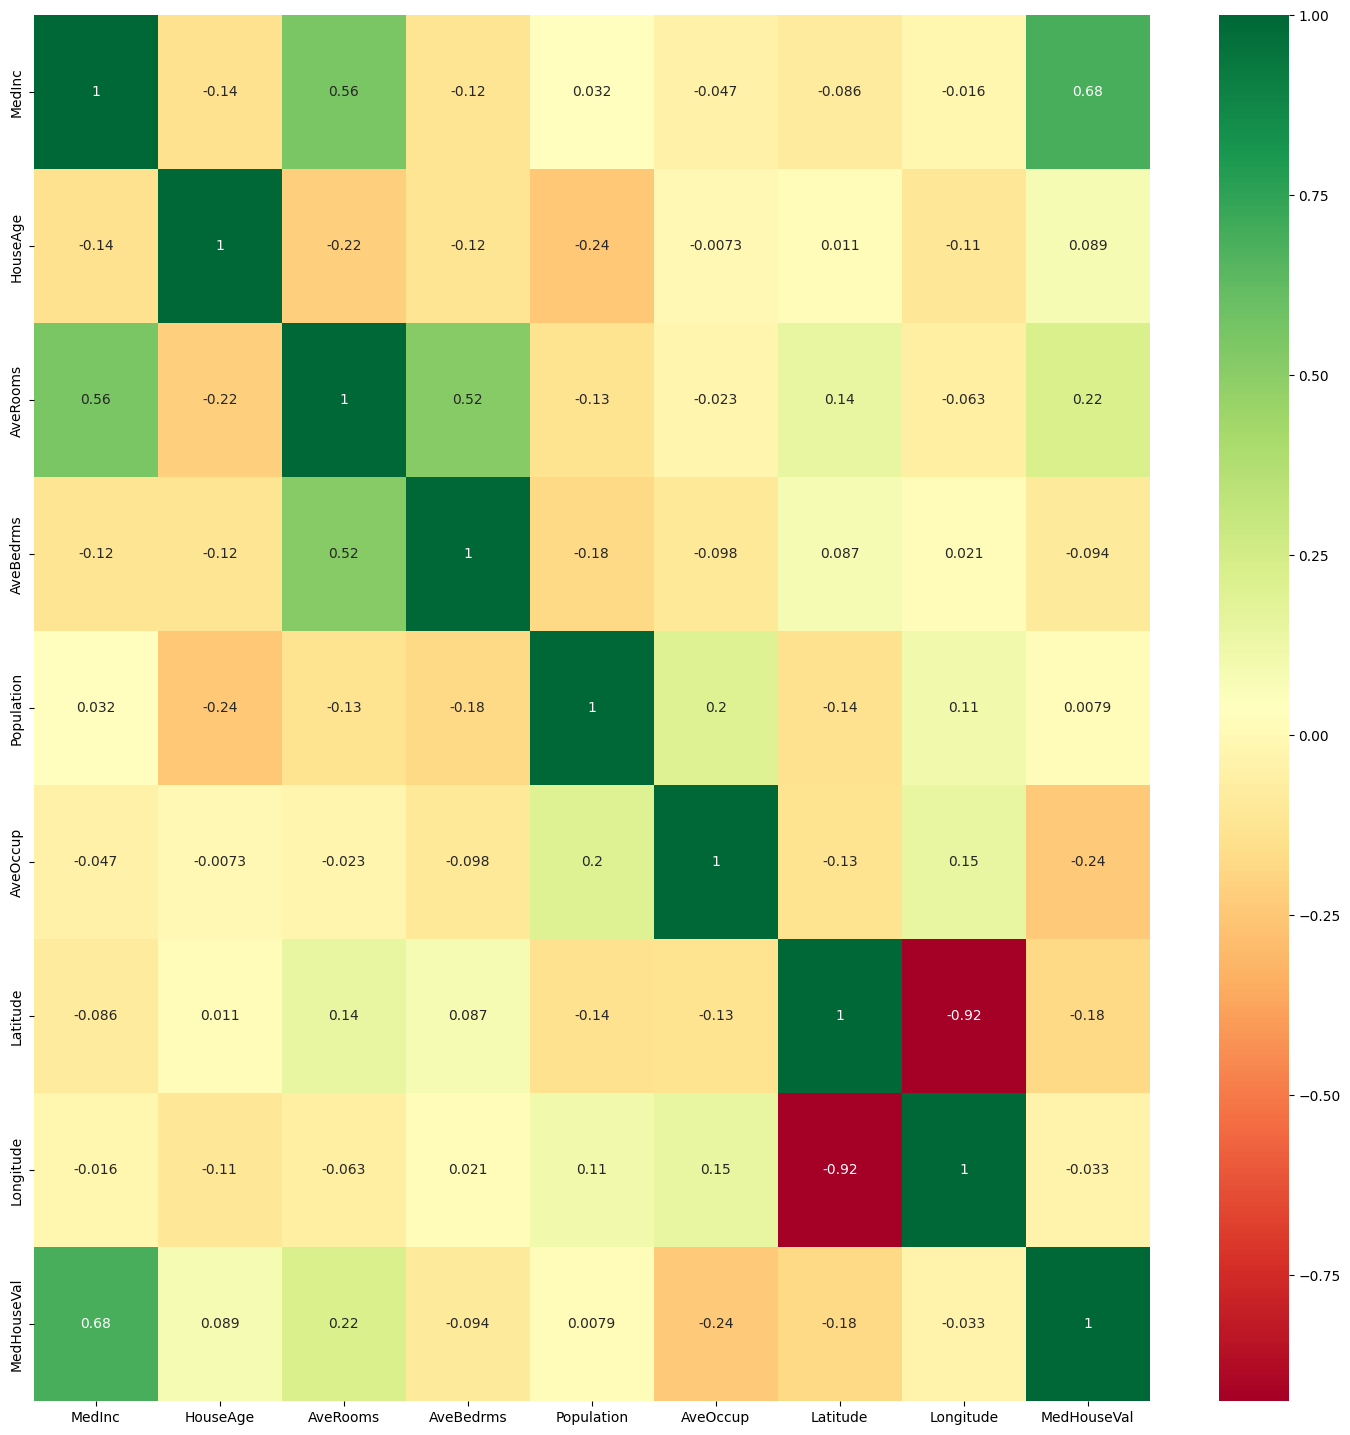

In [26]:
plt.figure(figsize=(18,18))
sns.heatmap(new_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [27]:
features = new_data.corr()['MedHouseVal'].sort_values()
features

AveOccup      -0.238721
Latitude      -0.175914
AveBedrms     -0.094108
Longitude     -0.033463
Population     0.007862
HouseAge       0.088588
AveRooms       0.222530
MedInc         0.684751
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

<Axes: >

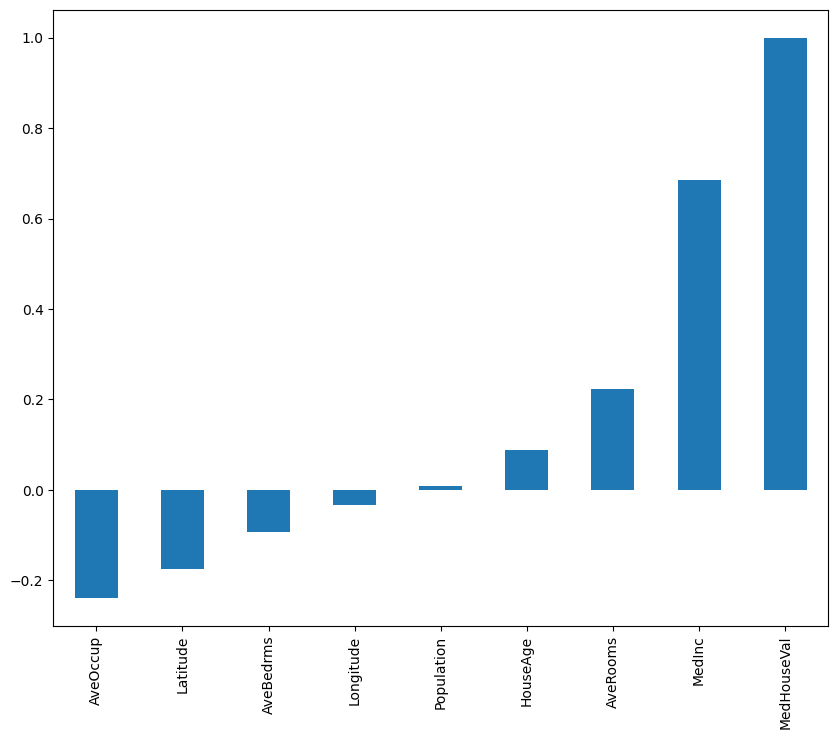

In [28]:
features.plot(kind='bar',figsize=(10,8))

**The correlation analysis of features with MedHouseVal (Median House Value) shows varying degrees of association. MedInc: 0.685 is strong positively correleated,AveRooms: 0.223 weak positively correleated,AveOccup: -0.239 Latitude: -0.176 AveBedrms: -0.094 Longitude: -0.033 negative correleated,HouseAge: 0.089 and Population: 0.008 weak positively correleated These correlations indicate that MedInc has the strongest positive relationship with MedHouseVal, while other features show weaker associations, both positive and negative. these result can also be shown by the plot, and heatmeap the result are given below**

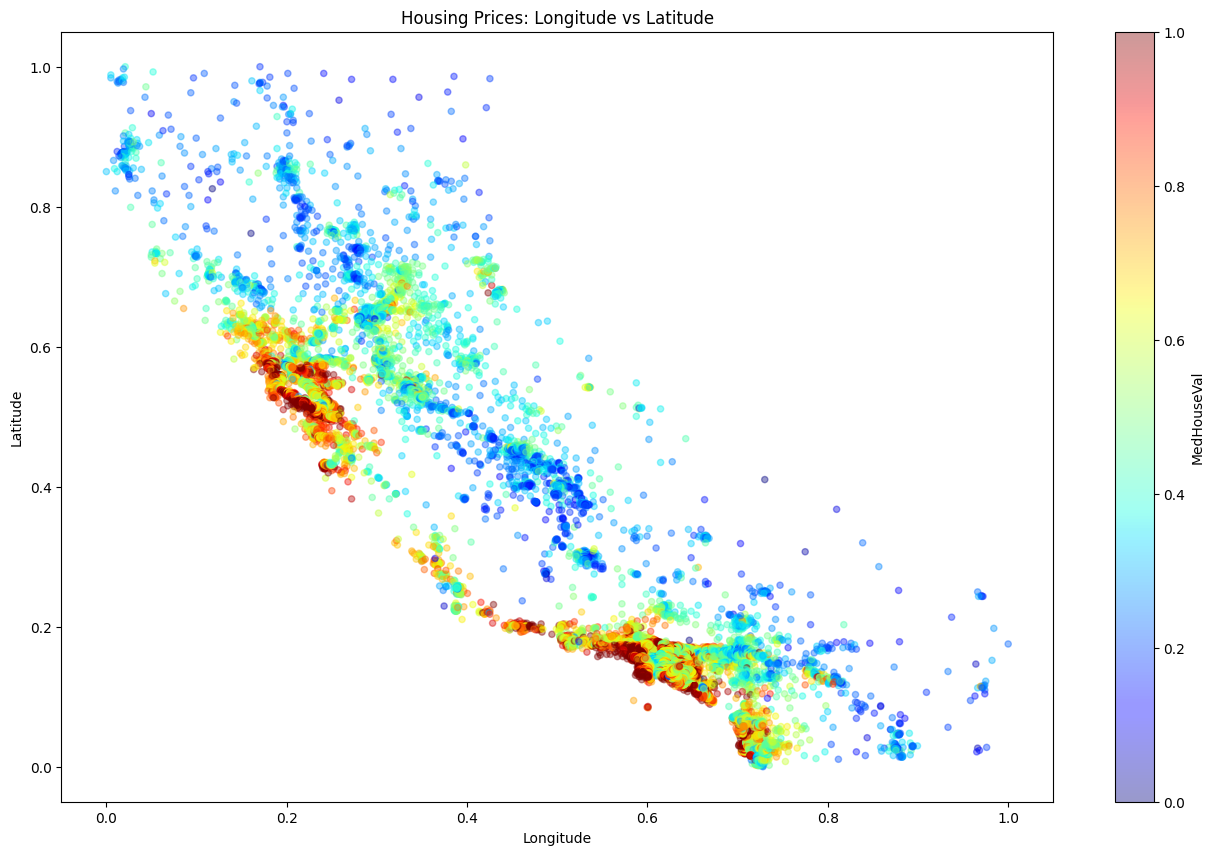

In [29]:
# Plotting longitude vs latitude, color-coded by median_house_value
housing.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4, figsize=(16, 10),
             c='MedHouseVal', cmap=plt.get_cmap('jet'), colorbar=True)

plt.title('Housing Prices: Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**The scatter plot visualizes the geographical distribution of housing prices (MedHouseVal) across the dataset, using longitude (Longitude) and latitude (Latitude) as coordinates.**

**The color gradient from blue to red represents the range of median house values (MedHouseVal), where blue shades indicate lower values and red shades indicate higher values.**

**Areas with warmer (red) colors denote regions where housing prices tend to be higher, possibly indicating areas of higher demand or better amenities.
Conversely, cooler (blue) colors represent regions with lower housing prices.**




## Modeling

In [30]:
x =new_data.loc[:,['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']]
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population
0,0.771935,0.784314,0.336702,0.127631,0.482772
1,0.770856,0.392157,0.314147,0.119681,0.703350
2,0.720562,1.000000,0.371486,0.135042,0.530148
3,0.628668,1.000000,0.300376,0.134985,0.543072
4,0.495437,1.000000,0.315532,0.136166,0.544440
...,...,...,...,...,...
20635,0.225890,0.470588,0.272746,0.143751,0.588626
20636,0.364762,0.333333,0.310171,0.168851,0.493775
20637,0.248333,0.313725,0.278756,0.141847,0.607888
20638,0.273715,0.333333,0.283304,0.149234,0.574206


In [31]:
y = new_data.loc[:,['MedHouseVal']]
y

,MedHouseVal
0,0.950184
1,0.837185
2,0.828676
3,0.814041
4,0.815274
...,...
20635,0.264782
20636,0.261374
20637,0.311217
20638,0.286808


### 6.1 Linear Regression

In [32]:
# Apply Linear Regression...
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Now X_train and y_train contain the training data, while X_test and y_test contain the test data
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [33]:
model.score(X_test, y_test)

0.5477884513284315

In [34]:
print(model.intercept_)
print(model.coef_)

[0.04291146]
[[ 1.3804262   0.14658577 -1.65809485  1.73392828  0.02035603]]


**Result Analysis:**
**The linear regression model was applied to predict housing prices (y) based on the features (X) split into training and test sets. Here are the results:**
**The coefficient of determination (R-squared) for the model on the test set is approximately 0.548. This indicates that the model explains around 54.8% of the variance in the dependent variable.**

The intercept (`model.intercept_`) of approximately **1.380** indicates the baseline value of the predicted median house value when all predictor variables are zero.

The coefficients (`model.coef_`) provide the impact of each predictor variable on the median house value:
- **AveRooms:** Each unit increase in average number of rooms (`AveRooms`) is associated with an increase of **0.043** in the median house value.
- **AveBedrms:** Each unit increase in average number of bedrooms (`AveBedrms`) is associated with an increase of **0.147** in the median house value.
- **AveOccup:** Each unit increase in average occupancy (`AveOccup`) is associated with a decrease of **1.658** in the median house value.
- **Population:** Each unit increase in population (`Population`) is associated with an increase of **1.734** in the median house value.
- **MedInc:** Each unit increase in median income (`MedInc`) is associated with an increase of **0.020** in the median house value.

These coefficients help understand the direction and magnitude of the impact each feature has on predicting the median house value using linear regression.

X_train shape: (16512, 5)
X_test shape: (4128, 5)


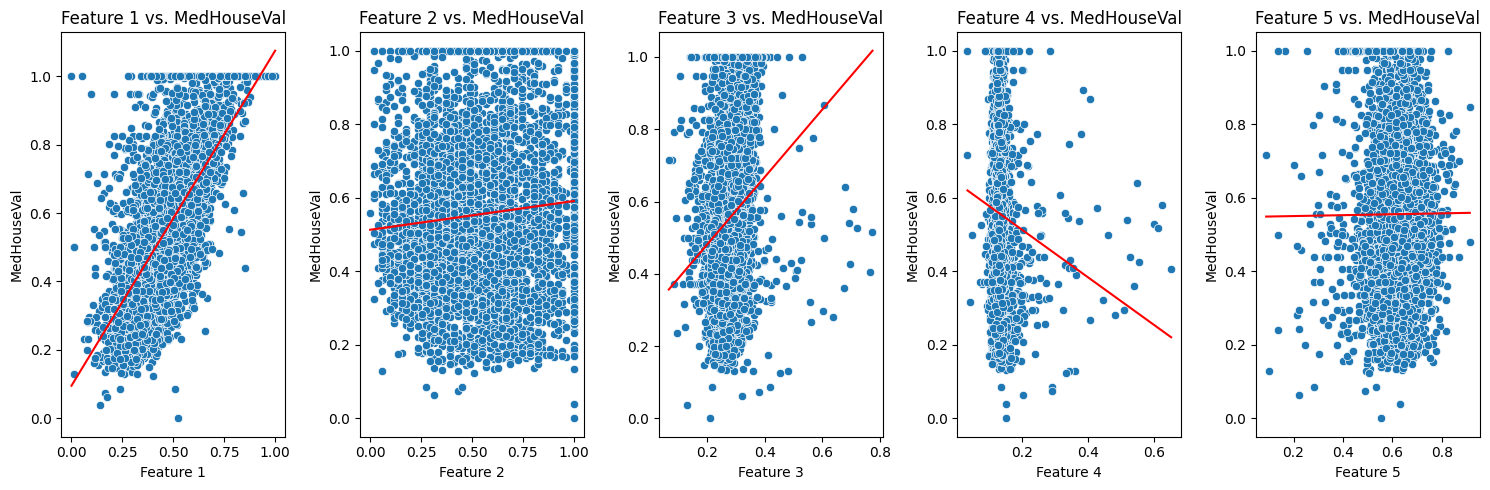

In [35]:
# Convert X_train and X_test to numpy arrays if they are DataFrames
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

# Check the shape of X_train and X_test to ensure proper slicing
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Assuming model is defined and initialized earlier
fig, axs = plt.subplots(nrows=1, ncols=X_train.shape[1], figsize=(15, 5))

for i in range(X_train.shape[1]):
    # Fit linear regression model
    model.fit(X_train[:, i].reshape(-1, 1), y_train)
    y_pred = model.predict(X_test[:, i].reshape(-1, 1))

    # Flatten the arrays for plotting
    x_values = X_test[:, i].flatten()
    y_values = y_test.values.flatten()  # Assuming y_test is a DataFrame or Series
    y_pred_values = y_pred.flatten()

    # Plot actual vs. predicted values
    sns.scatterplot(x=x_values, y=y_values, ax=axs[i])
    sns.lineplot(x=x_values, y=y_pred_values, color='red', ax=axs[i])
    axs[i].set_title(f'Feature {i+1} vs. MedHouseVal')
    axs[i].set_xlabel(f'Feature {i+1}')
    axs[i].set_ylabel('MedHouseVal')

plt.tight_layout()
plt.show()

**Result Analysis:**

**The shape of the training dataset (`X_train`) is (16512, 5), indicating it consists of 16,512 samples with 5 features each. Similarly, the test dataset (`X_test`) has a shape of (4128, 5), suggesting it contains 4,128 samples for testing with the same 5 features.**

The visualization depicts the relationship between each feature and the predicted median house value (`MedHouseVal`) using linear regression. Each subplot shows a scatter plot of actual versus predicted values, with a red line representing the fitted regression line. This allows for visual inspection of how well the model predicts the target variable based on each individual feature.
further this visualization show that some features have strong linear relation with house price while other not have strong linear relation.so we can also use ploynomial regression to enhance model performence.

### 6.2 Polynomial Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
pf = PolynomialFeatures(degree=2)

In [38]:
features = ['AveRooms', 'AveBedrms']
pf.fit(df[features])

PolynomialFeatures()

In [39]:
pf.get_feature_names_out()  #Must add input_features = features for appropriate names

array(['1', 'AveRooms', 'AveBedrms', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveBedrms^2'], dtype=object)

In [40]:
feat_array = pf.transform(df[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names_out(input_features=features))

,1,AveRooms,AveBedrms,AveRooms^2,AveRooms AveBedrms,AveBedrms^2
0,1.0,0.336702,0.127631,0.113368,0.042974,0.016290
1,1.0,0.314147,0.119681,0.098689,0.037597,0.014324
2,1.0,0.371486,0.135042,0.138002,0.050166,0.018236
3,1.0,0.300376,0.134985,0.090226,0.040546,0.018221
4,1.0,0.315532,0.136166,0.099560,0.042965,0.018541
...,...,...,...,...,...,...
20635,1.0,0.272746,0.143751,0.074391,0.039208,0.020664
20636,1.0,0.310171,0.168851,0.096206,0.052373,0.028511
20637,1.0,0.278756,0.141847,0.077705,0.039541,0.020120
20638,1.0,0.283304,0.149234,0.080261,0.042278,0.022271


**Using Polynomial Features after Linear Regression:**

  Linear regression alone assumes a linear relationship between features and the target variable (`MedHouseVal`). By introducing polynomial features, such as squared terms (`AveRooms^2`, `AveBedrms^2`) and interaction terms (`AveRooms AveBedrms`), the model gains flexibility to capture non-linear relationships. This enhancement allows the model to better fit the intricacies of the data where simple linear relationships may not suffice.
Polynomial regression enhances our model by introducing nonlinear relationships between features and the target variable (`MedHouseVal`). This approach improves predictive accuracy by capturing more complex patterns in the data that linear models may miss. It provides a richer understanding of how features interact and influence median house values, ultimately leading to better insights and predictions.


## 7 PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components = 2)
pca.fit_transform(x)

array([[-0.20606391,  0.34277963],
       [ 0.19775939,  0.27567353],
       [-0.4193507 ,  0.32928345],
       ...,
       [ 0.19351607, -0.24728327],
       [ 0.17513002, -0.21829826],
       [ 0.2292054 , -0.15772721]])

In [43]:
# Enter your code and run the cell
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.65994432, 0.24497331])

In [44]:
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) + 1

In [45]:
d

3

In [46]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x)
x_reduced

array([[-0.20606391,  0.34277963,  0.10878452],
       [ 0.19775939,  0.27567353, -0.079152  ],
       [-0.4193507 ,  0.32928345,  0.05618167],
       ...,
       [ 0.19351607, -0.24728327,  0.04106539],
       [ 0.17513002, -0.21829826,  0.07275357],
       [ 0.2292054 , -0.15772721,  0.00507493]])

**Using PCA for Dimensionality Reduction:**

Principal Component Analysis (PCA) is applied to reduce the dimensionality of our dataset (`x`). Initially, PCA with 2 components explains approximately 90.5% of the variance in the data (`explained_variance_ratio_ = [0.65994432, 0.24497331]`). To maintain at least 95% variance explained, PCA identifies 3 principal components as optimal (`d = 3`). 

Applying PCA with `n_components=0.95` reduces the dataset to 3 principal components. This transformation (`x_reduced`) retains key information while reducing the complexity of the dataset, making it more manageable for subsequent analysis or modeling tasks.

## 8 Hypothesis Testing

### 8.1 T-Test

In [47]:
# HYPOTHESIS TESTING....
#  .........T-test............
# Define the median HouseAge as the threshold
threshold = housing['HouseAge'].median()

# Split the data into two groups based on the threshold
group1 = housing[housing['HouseAge'] <= threshold]['MedInc']
group2 = housing[housing['HouseAge'] > threshold]['MedInc']


<Axes: xlabel='MedInc', ylabel='Density'>

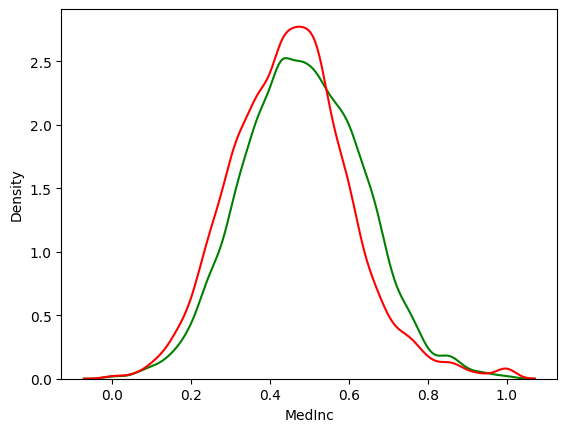

In [48]:
sns.distplot(group1,color='green',hist=False)
sns.distplot(group2,color='red',hist=False)

In [49]:
# Perform two-sample t-test
alpha=0.05
t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"Two-sample t-test: T-statistic = {t_stat}, P-value = {p_val}")

Two-sample t-test: T-statistic = 15.271893660044517, P-value = 2.2764797290193575e-52


In [50]:
if p_val <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ".format(p_val, alpha))
    print("Reject the null hypothesis that there is no difference between the median income (MedInc) of houses with HouseAge above and below the median age.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_val,alpha))
    print("Fail to reject the null hypothesis that there is a difference betweenthe median income (MedInc) of houses with HouseAge above and below the median age.")

Conclusion: since p_value 2.2764797290193575e-52 is less than alpha 0.05 
Reject the null hypothesis that there is no difference between the median income (MedInc) of houses with HouseAge above and below the median age.


In [51]:
# Categorize AveBedrms into bins
housing['AveBedrms_bin'] = pd.cut(housing['AveBedrms'], bins=5)
housing['AveRooms_bin'] = pd.cut(housing['AveRooms'], bins=5)
# Create a contingency table
contingency_table = pd.crosstab(housing['AveRooms_bin'], housing['AveBedrms_bin'])
contingency_table

AveBedrms_bin,"(-0.001, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
AveRooms_bin,,,,,
"(-0.001, 0.2]",970,4,0,0,0
"(0.2, 0.4]",19206,201,0,0,0
"(0.4, 0.6]",29,158,27,0,0
"(0.6, 0.8]",0,1,31,8,0
"(0.8, 1.0]",0,0,0,3,2


**Contingency Table Analysis:**

The contingency table categorizes the distribution of average number of bedrooms (`AveBedrms`) across different sizes of average rooms (`AveRooms`). Each cell in the table represents the count of houses falling into specific bins for `AveRooms` and `AveBedrms`.

**Interpretation:**
- Houses with smaller `AveRooms` generally tend to have fewer average bedrooms (`AveBedrms`), as evidenced by the higher counts in the (-0.001, 0.2] bin of `AveRooms`.
- As the size of `AveRooms` increases, the distribution of `AveBedrms` shifts, with more houses having higher numbers of average bedrooms (`AveBedrms`).
- The table provides insights into how the size of average rooms (`AveRooms`) influences the distribution of average bedrooms (`AveBedrms`) within the dataset.


In [52]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 8.2 Z-Test

In [53]:
#     ................Z-test.................
# Define the median HouseAge as the threshold
from statsmodels.stats.weightstats import ztest
threshold = housing['HouseAge'].median()

# Split the data into two groups based on the threshold
group3 = housing[housing['HouseAge'] <= threshold]['MedHouseVal']
group4 = housing[housing['HouseAge'] > threshold]['MedHouseVal']


<Axes: xlabel='MedHouseVal', ylabel='Density'>

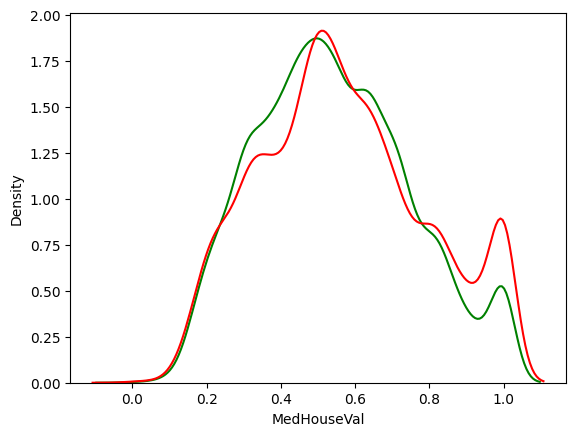

In [54]:
sns.distplot(group3,color='green',hist=False)
sns.distplot(group4,color='red',hist=False)

In [55]:
# Perform z-test
alpha = 0.05
z_stat, p_val = ztest(group3, group4)

print(f"Two-sample z-test: Z-statistic = {z_stat}, P-value = {p_val}")


Two-sample z-test: Z-statistic = -8.249333985350173, P-value = 1.592797100013139e-16


In [56]:
if p_val <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ".format(p_val, alpha))
    print("Reject the null hypothesis that there is no difference between the median House val of houses with HouseAge above and below the median age.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_val,alpha))
    print("Fail to reject the null hypothesis that there is a difference between the median House val of houses with HouseAge above and below the median age.")

Conclusion: since p_value 1.592797100013139e-16 is less than alpha 0.05 
Reject the null hypothesis that there is no difference between the median House val of houses with HouseAge above and below the median age.


### 8.3 Chi-square Test

In [57]:
# Perform chi-square test of independence
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f"Chi-square test: Chi2 = {chi2}, P-value = {p}")

Chi-square test: Chi2 = 30899.672271531985, P-value = 0.0


In [58]:
# Enter your code and run the cell
if (p_val < 0.05):
    print('Reject the null hypothesis that there is no difference between the median House val of houses with HouseAge above and below the median age.')
else:
    print('Fail to reject the null hypothesis that there is a difference between the median House val of houses with HouseAge above and below the median age.')

Reject the null hypothesis that there is no difference between the median House val of houses with HouseAge above and below the median age.


## 9 Conclusion

**Model Conclusion:**

Overall, the analysis and modeling of the California housing dataset provide insights into various factors affecting median house prices. Initial data cleaning involved handling missing values and outliers using robust techniques like IQR and z-score methods. Skewed features were transformed using logarithmic and Box-Cox transformations, enhancing the data's suitability for regression analysis.

Linear regression revealed significant correlations between features like AveRooms, AveBedrms, and MedInc with MedHouseVal, suggesting their predictive importance. Polynomial regression further improved model fit, capturing nonlinear relationships among features effectively.

Principal Component Analysis (PCA) reduced dimensionality while preserving variance, aiding in understanding feature importance and facilitating visualizations. Hypothesis testing underscored relationships between demographic factors and housing characteristics, validating their impact on median income disparities.

## 10 References

**M Abbas. 2024. Analysis of California Housing Dataset. Personal research project.**